## Práctica 2: Repositorio COVID

**NOTA: Los print más largos están comentados**

### Conectarse al repositorio oficial de la Universidad Jhons Hopkins por medio de una API (biblioteca "covid").
#### Importar la librería y crear objeto covid (además vemos el nombre de la fuente)

In [173]:
from covid import Covid
from operator import itemgetter
import matplotlib.pyplot as plt


print(covid.source)
covid = Covid()
#covid.get_data()


john_hopkins


In [174]:
lista = covid.list_countries()
#print("\nLista de países por ID: \n",lista)

### Recolección de datos excluyendo a USA

In [175]:
data=[]

# Recolección de  datos excluyendo a USA
for i in range(len(lista)):
    id = int(lista[i].get('id'))
    if id != 179:
        data.append(covid.get_status_by_country_id(id))

print(data)

[{'id': '24', 'country': 'Brazil', 'confirmed': 12490362, 'active': 1236768, 'deaths': 310550, 'recovered': 10943044, 'latitude': -14.235, 'longitude': -51.9253, 'last_update': 1616891295000}, {'id': '80', 'country': 'India', 'confirmed': 11908910, 'active': 452647, 'deaths': 161240, 'recovered': 11295023, 'latitude': 20.593684, 'longitude': 78.96288, 'last_update': 1616891295000}, {'id': '63', 'country': 'France', 'confirmed': 4569164, 'active': 4178362, 'deaths': 94623, 'recovered': 296179, 'latitude': 46.2276, 'longitude': 2.2137, 'last_update': 1616891295000}, {'id': '143', 'country': 'Russia', 'confirmed': 4460348, 'active': 281118, 'deaths': 95792, 'recovered': 4083438, 'latitude': 61.524, 'longitude': 105.3188, 'last_update': 1616891295000}, {'id': '183', 'country': 'United Kingdom', 'confirmed': 4343066, 'active': 4203541, 'deaths': 126813, 'recovered': 12712, 'latitude': 55.0, 'longitude': -3.0, 'last_update': 1616891295000}, {'id': '86', 'country': 'Italy', 'confirmed': 35124

Aquí se hizo una prueba para poder limpiar atributos de cada elemento

In [176]:
dato = covid.get_status_by_country_id(1)

dato.pop('active')
dato.pop('deaths')
dato.pop('recovered')
dato.pop('latitude')
dato.pop('longitude')
dato.pop('last_update')
print(dato)

{'id': '1', 'country': 'Afghanistan', 'confirmed': 56290}


Limpieza de todos los países, dejando solo sus id, nombre y casos confirmados

In [177]:
for i in range (len(data)):
    data[i].pop('id')
    data[i].pop('active')
    data[i].pop('deaths')
    data[i].pop('recovered')
    data[i].pop('latitude')
    data[i].pop('longitude')
    data[i].pop('last_update')

#print(data)

Ordenar datos por mayor cantidad de casos confirmados

In [178]:
data_ordered = sorted(data, key=itemgetter('confirmed'),reverse=True)
#print(data_ordered)

In [179]:
main_data=[]

for i in range(0,10):
    main_data.append(data_ordered[i])
    
print(main_data)

[{'country': 'Brazil', 'confirmed': 12490362}, {'country': 'India', 'confirmed': 11908910}, {'country': 'France', 'confirmed': 4569164}, {'country': 'Russia', 'confirmed': 4460348}, {'country': 'United Kingdom', 'confirmed': 4343066}, {'country': 'Italy', 'confirmed': 3512453}, {'country': 'Spain', 'confirmed': 3255324}, {'country': 'Turkey', 'confirmed': 3179115}, {'country': 'Germany', 'confirmed': 2770696}, {'country': 'Colombia', 'confirmed': 2375591}]


Crear lista de países y crear lista de casos

In [180]:
lista_paises = []
lista_casos = []

pais = main_data[1].get('country')
for i in range(len(main_data)):
    lista_paises.append(main_data[i].get('country'))
    lista_casos.append(main_data[i].get('confirmed'))

print(lista_paises)
print(lista_casos)

['Brazil', 'India', 'France', 'Russia', 'United Kingdom', 'Italy', 'Spain', 'Turkey', 'Germany', 'Colombia']
[12490362, 11908910, 4569164, 4460348, 4343066, 3512453, 3255324, 3179115, 2770696, 2375591]


## **Parte de graficación**

In [181]:
import seaborn as sns

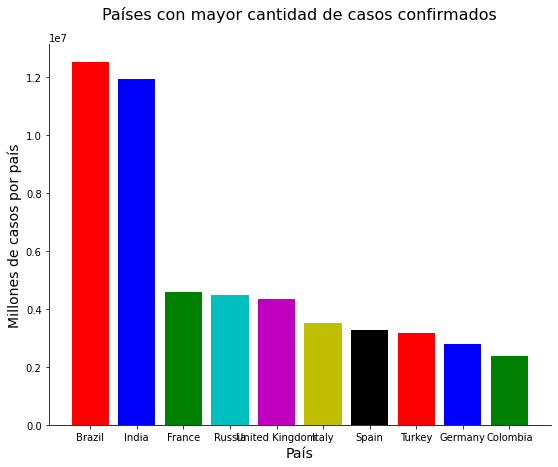

In [182]:
colores=['red', 'blue', 'orange', 'yellow', 'grey','brown','purple','black','green','pink']

plt.figure(figsize=(9,7))
plt.title('Países con mayor cantidad de casos confirmados',size=16,pad=25)

plt.bar(lista_paises,lista_casos, color=['r','b','g','c','m','y','k'])
plt.ylabel("Millones de casos por país", size=14)
plt.xlabel("País", size=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.grid(False)
plt.show()

          country  confirmed
0          Brazil   12490362
1           India   11908910
2          France    4569164
3          Russia    4460348
4  United Kingdom    4343066
5           Italy    3512453
6           Spain    3255324
7          Turkey    3179115
8         Germany    2770696
9        Colombia    2375591


<AxesSubplot:>

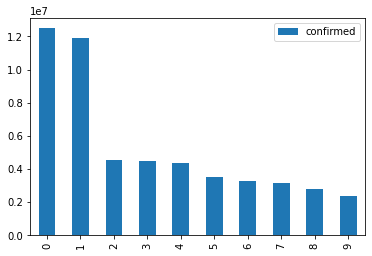

In [183]:
from pandas import DataFrame



df = DataFrame (main_data,columns=['country','confirmed'])
print (df)
df.plot(kind='bar')